In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import pandasql
from pandasql import sqldf, load_meat, load_births
import re

In [7]:
nyc_jobs = pd.read_csv("NYC_Jobs.tsv", sep='\t')

## The original columns

In [43]:
original_columns = list(nyc_jobs.columns)
print(original_columns)

['Job ID', 'Agency', 'Posting Type', 'Business Title', 'Civil Service Title', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To', 'Salary Frequency', 'Work Location', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1', 'Recruitment Contact', 'Residency Requirement', 'Posting Date', 'Post Until', 'Posting Updated', 'Process Date']


## To clean column names

In [44]:
def clean_title(col_name):
    col_name = col_name.strip().lower()
    return re.sub(r'[^a-z0-9]', '_', col_name)

## Cleaned column names

In [48]:
clean_columns = [clean_title(each_col) for each_col in original_columns]
print(clean_columns)

['job_id', 'agency', 'posting_type', 'business_title', 'civil_service_title', 'title_code_no', 'level', 'job_category', 'full_time_part_time_indicator', 'salary_range_from', 'salary_range_to', 'salary_frequency', 'work_location', 'division_work_unit', 'job_description', 'minimum_qual_requirements', 'preferred_skills', 'additional_information', 'to_apply', 'hours_shift', 'work_location_1', 'recruitment_contact', 'residency_requirement', 'posting_date', 'post_until', 'posting_updated', 'process_date']


In [49]:
nyc_jobs.columns = clean_columns

In [51]:
nyc_jobs.head()

,job_id,agency,posting_type,business_title,civil_service_title,title_code_no,level,job_category,full_time_part_time_indicator,salary_range_from,...,additional_information,to_apply,hours_shift,work_location_1,recruitment_contact,residency_requirement,posting_date,post_until,posting_updated,process_date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,06/24/2011,NaN,06/24/2011,10/22/2019
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,01/26/2012,NaN,01/26/2012,10/22/2019
2,132292,NYC HOUSING AUTHORITY,Internal,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,10/24/2013,NaN,12/12/2013,10/22/2019
3,132292,NYC HOUSING AUTHORITY,External,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,10/24/2013,NaN,12/12/2013,10/22/2019
4,133921,NYC HOUSING AUTHORITY,Internal,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,01/09/2014,NaN,01/08/2014,10/22/2019


In [65]:
nyc_jobs['date_time'] = nyc_jobs['posting_date'].astype('datetime64[ns]')

## SQL on Pandas

In [66]:
pysqldf = lambda q: sqldf(q, globals())
pysqldf("SELECT salary_range_from, salary_range_to FROM nyc_jobs where job_category like '%Technology%' LIMIT 10;").head()

,salary_range_from,salary_range_to
0,87203.0,131623.0
1,87203.0,131623.0
2,43292.0,53000.0
3,81290.0,95896.0
4,45174.0,62370.0


## Exercises

Come up with questions to answers with this dataset

In [80]:
postings_per_day = pysqldf('''SELECT count(0) num_posting_per_day, posting_date FROM nyc_jobs '''
                            ''' where posting_date is not null group by posting_date order by posting_date desc;''')
postings_per_day

,num_posting_per_day,posting_date
0,2,12/31/2018
1,2,12/27/2016
2,1,12/23/2016
3,2,12/22/2016
4,1,12/21/2015
...,...,...
478,2,01/06/2017
479,1,01/04/2017
480,4,01/03/2019
481,6,01/03/2017


In [85]:
postings_per_day2 = pysqldf('''SELECT count(0) num_posting_per_day, posting_date FROM nyc_jobs '''
                            ''' where posting_date is not null group by date_time order by date_time asc;''')
postings_per_day2

,num_posting_per_day,posting_date
0,1,06/24/2011
1,1,01/26/2012
2,2,10/24/2013
3,1,12/09/2013
4,1,12/20/2013
...,...,...
478,70,10/16/2019
479,31,10/17/2019
480,57,10/18/2019
481,1,10/19/2019


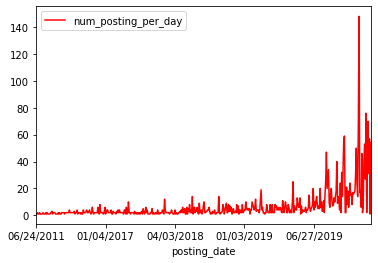

In [86]:
postings_per_day2.plot(kind='line',x='posting_date',y='num_posting_per_day',color='red')
plt.show()

In [87]:
postings_per_day2['year_month'] = postings_per_day2['date_time'].map(lambda x: 100*x.year + x.month)

KeyError: 'date_time'

## Can we predict how many jobs will be posted in the future?

In [64]:
nyc_jobs['date_time'].dtype

dtype('<M8[ns]')

In [ ]:
nyc_jobs['date_time']